<a href="https://www.kaggle.com/code/yaramahrous/hr-clustering-prediction?scriptVersionId=199753615" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="
  background-color: #f9f9f9;
  padding: 20px;
  border-left: 6px solid #4caf50;
  border-radius: 10px;
  font-family: 'Arial Black', sans-serif;
  color: #800080;
  font-size: 30px;
  text-align: left;
">
  📚 Import Libraries
</div>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots


<div style="
  background-color: #f9f9f9;
  padding: 20px;
  border-left: 6px solid #4caf50;
  border-radius: 10px;
  font-family: 'Arial Black', sans-serif;
  color: #b22222;
  font-size: 30px;
  text-align: left;
">
  ⚠️ Remove Warnings
</div>


In [2]:
import warnings
warnings.filterwarnings('ignore')

<div style="
  background-color: #f9f9f9;
  padding: 20px;
  border-left: 6px solid #4caf50;
  border-radius: 10px;
  font-family: 'Arial Black', sans-serif;
  color: #4682b4; /* Changed color */
  font-size: 30px;
  text-align: left;
">
  📥 Load Data
</div>


In [3]:
df =pd.read_csv('hr.csv')

In [4]:
#display all columns and rows
pd.set_option("display.max_columns",None)
pd.set_option('display.max_rows',None)

<div style="
  background-color: #f9f9f9;
  padding: 20px;
  border-left: 6px solid #4caf50;
  border-radius: 10px;
  font-family: 'Arial Black', sans-serif;
  color:#228b22;
  font-size: 30px;
  text-align: left;
">
  🔍 Data Exploration
</div>


In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [6]:
df.shape

(1470, 35)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1470 entries, 0 to 1469

Data columns (total 35 columns):

 #   Column                    Non-Null Count  Dtype 

---  ------                    --------------  ----- 

 0   Age                       1470 non-null   int64 

 1   Attrition                 1470 non-null   object

 2   BusinessTravel            1470 non-null   object

 3   DailyRate                 1470 non-null   int64 

 4   Department                1470 non-null   object

 5   DistanceFromHome          1470 non-null   int64 

 6   Education                 1470 non-null   int64 

 7   EducationField            1470 non-null   object

 8   EmployeeCount             1470 non-null   int64 

 9   EmployeeNumber            1470 non-null   int64 

 10  EnvironmentSatisfaction   1470 non-null   int64 

 11  Gender                    1470 non-null   object

 12  HourlyRate                1470 non-null   int64 

 13  JobInvolvement            1470 non-null   int64 

 14  JobLe

In [8]:
null_counts = df.isnull().sum()
null_percentages = (null_counts / len(df)) * 100
null_summary = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage': null_percentages
})

null_summary = null_summary.style.format({
    'Null Count': '{:.0f}',
    'Null Percentage': '{:.2f}%'
}).background_gradient(cmap='coolwarm')

null_summary

,Null Count,Null Percentage
Age,0,0.00%
Attrition,0,0.00%
BusinessTravel,0,0.00%
DailyRate,0,0.00%
Department,0,0.00%
DistanceFromHome,0,0.00%
Education,0,0.00%
EducationField,0,0.00%
EmployeeCount,0,0.00%
EmployeeNumber,0,0.00%


- there is no null values

In [9]:
df.duplicated().sum()

0

- no duplicates

In [10]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [24]:
mapping_dict = {'Yes': 1, 'No': 0}
df['Attrition'] = df['Attrition'].map(mapping_dict)


In [6]:
df['Attrition'].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [13]:
df_corr = df.select_dtypes(include=['number']).corr()

In [15]:
threshold = 0.2
def highlight_attrition_corr(s):
    is_low = abs(s) < threshold
    return ['background-color: yellow' if val and col == 'Attrition' else '' for val, col in zip(is_low, s.index)]
styled_df_corr = df_corr.style.apply(highlight_attrition_corr, axis=0)
styled_df_corr

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,nan,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,nan,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,nan,-0.010577,-0.103369,-0.006846,-0.130016,-0.169105,-0.103481,-0.159840,0.015170,0.043494,-0.013478,0.002889,-0.045872,nan,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,nan,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,nan,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,nan,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,nan,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,nan,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,nan,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
EmployeeNumber,-0.010145,-0.010577,-0.050990,0.032916,0.042070,nan,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,nan,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,nan,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,nan,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,nan,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,nan,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,nan,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,nan,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976


lets drop columns with low correlations with target

In [5]:
columns_to_drop = ["EmployeeCount","StandardHours","PerformanceRating"]
df= df.drop(columns=columns_to_drop)


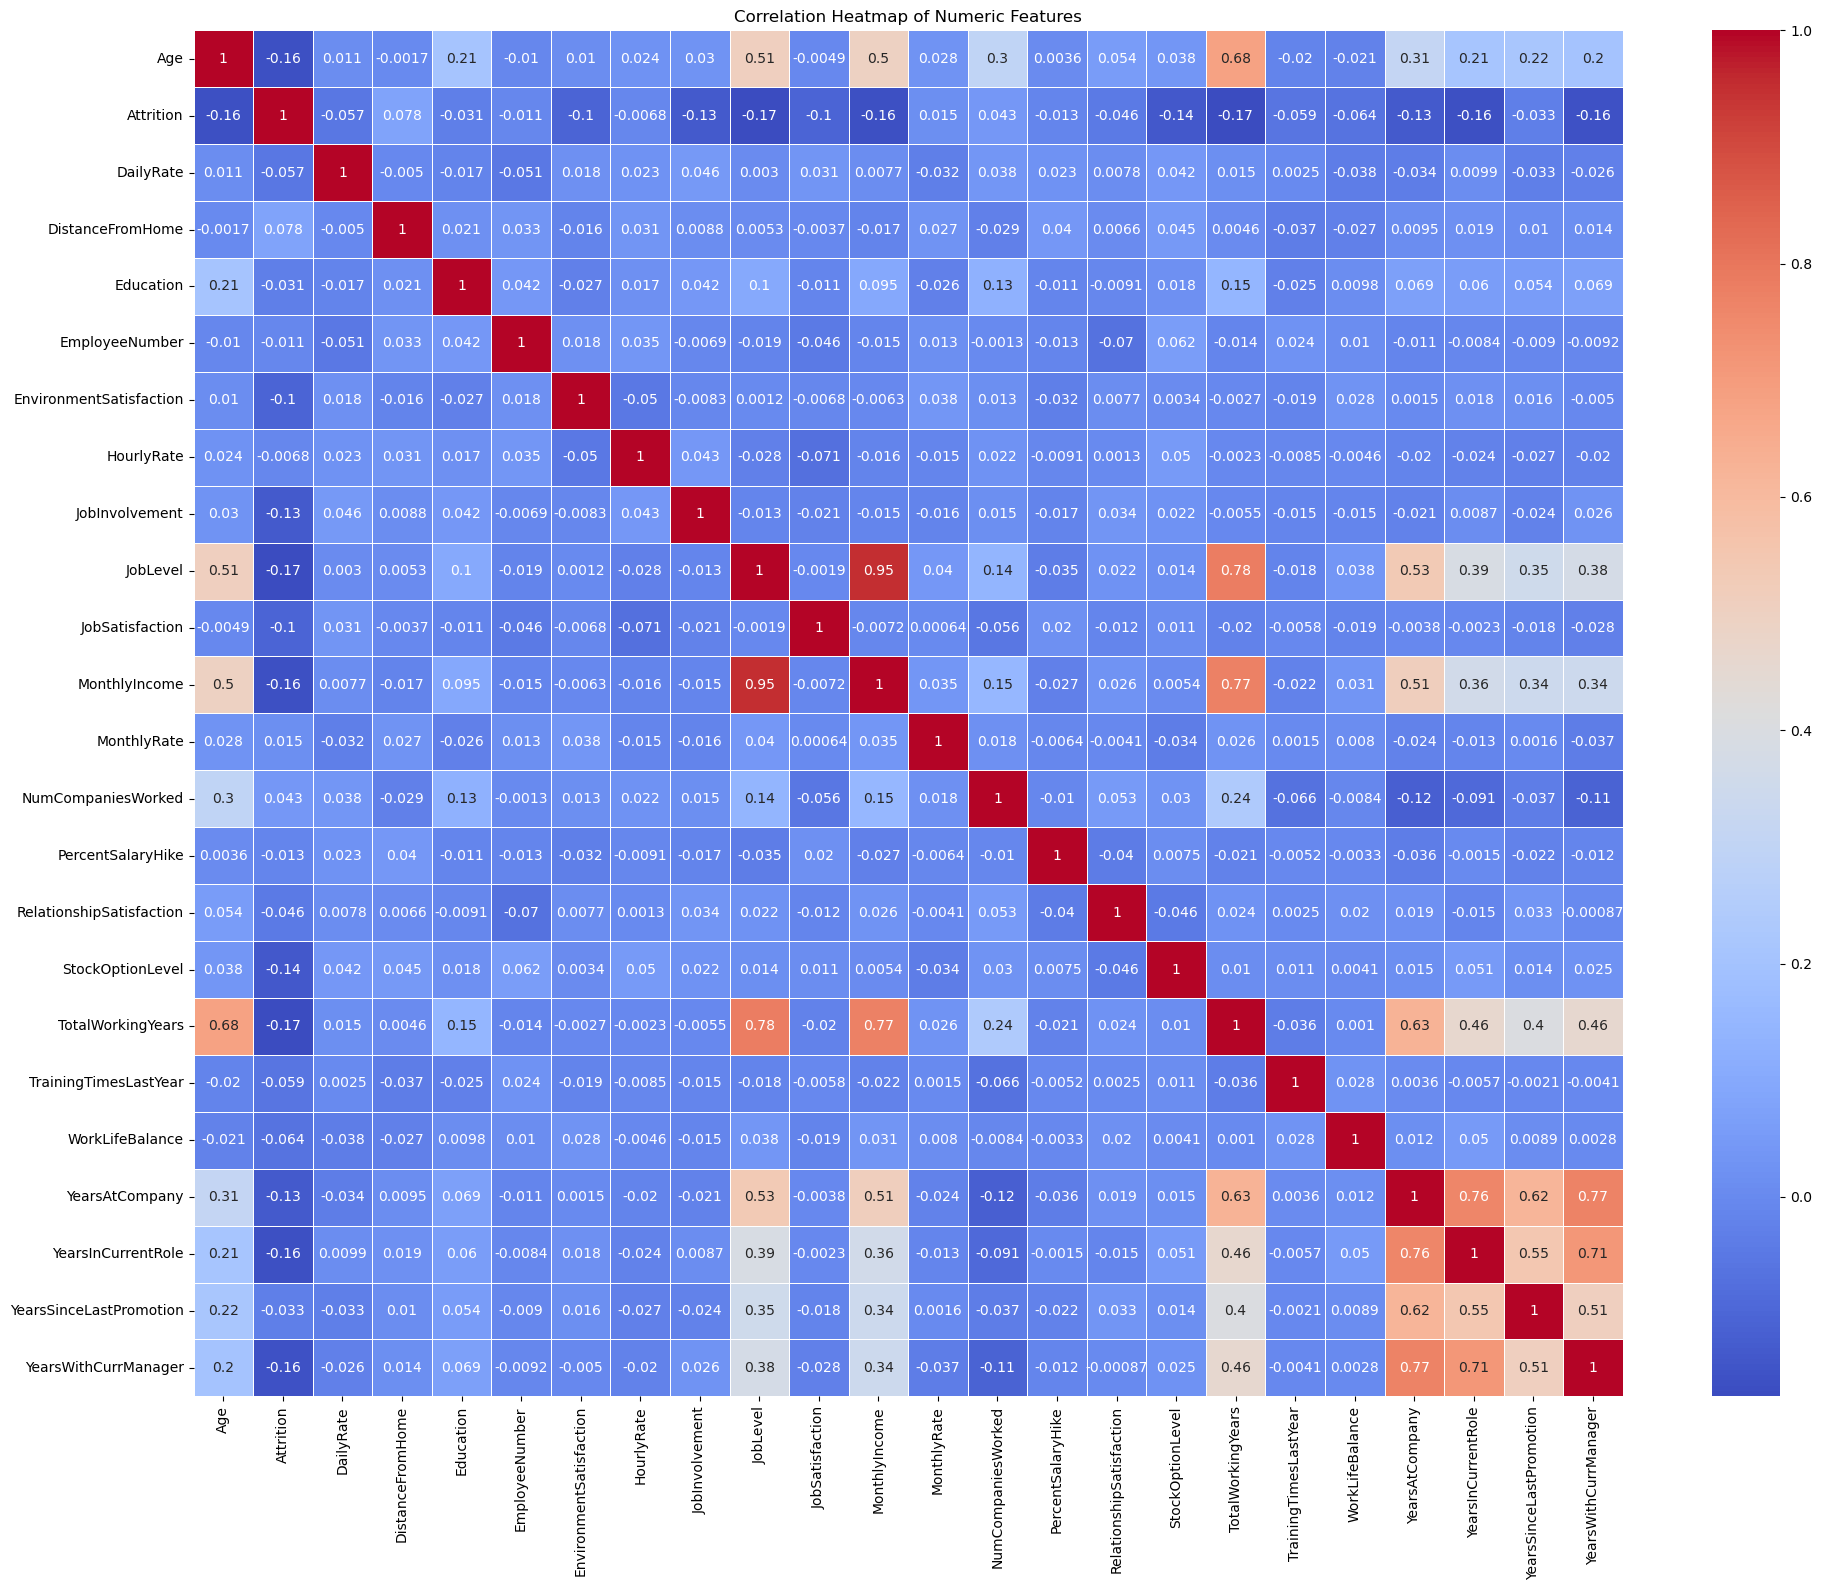

In [17]:
numeric_df = df.select_dtypes(include=['number'])

# Create the heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

<div style="
  background-color: #f9f9f9;
  padding: 20px;
  border-left: 6px solid #4caf50;
  border-radius: 10px;
  font-family: 'Arial Black', sans-serif;
  color: #4682b4; /* Changed color */
  font-size: 30px;
  text-align: left;
">
  📥Feature Engineering
</div>


In [6]:
bins = [18, 25, 35, 45, 55, 65]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [7]:
df['HighIncome'] = (df['MonthlyIncome'] > 8000).astype(int)

In [8]:

bin_edges = [0,5,10,15,20,30]
bin_labels = ['0-5 kms', '6-10 kms', '11-15 kms','16-20 kms', '20+ kms']
df['DistanceGroup'] = pd.cut(df['DistanceFromHome'], bins=bin_edges, labels=bin_labels)

In [9]:
df['IncomeToRateRatio'] = df['MonthlyIncome'] / df['MonthlyRate']

In [10]:
df['TotalSatisfaction_mean'] = (df['RelationshipSatisfaction']  + df['EnvironmentSatisfaction'] + df['JobSatisfaction'] + df['JobInvolvement'] + df['WorkLifeBalance'])/5

In [11]:
df['JobEnvSatisfactionInteraction'] = df['JobSatisfaction'] * df['EnvironmentSatisfaction']

<div style="
  background-color: #f9f9f9;
  padding: 20px;
  border-left: 6px solid #4caf50;
  border-radius: 10px;
  font-family: 'Arial Black', sans-serif;
  color: #800080;
  font-size: 30px;
  text-align: left;
">
  📚Encoding Part
</div>


In [12]:
cols = ["Over18"]
df.drop(columns=cols, inplace=True)

In [13]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le = LabelEncoder()
encoder = OneHotEncoder()

In [14]:
df["Gender"] = df["Gender"].replace({"Female":0 ,"Male":1})

In [15]:
df = pd.get_dummies(df, columns=['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime'], drop_first=True)


In [16]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
df[['AgeGroup', 'DistanceGroup']] = ordinal_encoder.fit_transform(df[['AgeGroup', 'DistanceGroup']])


In [17]:
cols_to_drop = ['PercentSalaryHike','WorkLifeBalance','YearsAtCompany']
df = df.drop(columns=cols_to_drop)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

In [19]:
y = df['Attrition']
X = df.drop(columns=['Attrition'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Doing oversampling beacause data imbalanced

In [22]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


<div style="
  background-color: #f9f9f9;
  padding: 20px;
  border-left: 6px solid #4caf50;
  border-radius: 10px;
  font-family: 'Arial Black', sans-serif;
  color: #800080;
  font-size: 30px;
  text-align: left;
">
   📚final Modeling 
</div>


# Cross Validation

In [20]:
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
import xgboost as xgb
from tqdm import tqdm


In [37]:
# Models
LR = LogisticRegression()
DTC = DecisionTreeClassifier()
KNC = KNeighborsClassifier()
svc = SVC()
RFC = RandomForestClassifier()
ABC = AdaBoostClassifier()
GBC = GradientBoostingClassifier()
XGB = xgb.XGBClassifier()


In [38]:
models = [LR, DTC, KNC, svc, RFC, ABC, GBC, XGB]

for model in models:
    accuracy = cross_val_score(model, X, y, scoring="accuracy", cv=5)
    print(f"{model.__class__.__name__}: {accuracy}\n")

LogisticRegression: [0.83673469 0.84013605 0.8537415  0.83333333 0.84013605]



DecisionTreeClassifier: [0.76870748 0.78571429 0.65306122 0.78571429 0.80272109]



KNeighborsClassifier: [0.81632653 0.82312925 0.82653061 0.81632653 0.82312925]



SVC: [0.83673469 0.83673469 0.84013605 0.84013605 0.84013605]



RandomForestClassifier: [0.86054422 0.86394558 0.86734694 0.8707483  0.8707483 ]



AdaBoostClassifier: [0.85034014 0.8877551  0.87414966 0.8537415  0.84693878]



GradientBoostingClassifier: [0.86734694 0.86734694 0.86054422 0.88095238 0.87755102]



XGBClassifier: [0.86394558 0.86394558 0.86734694 0.87755102 0.88435374]




# Grid-Search

In [25]:

scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

models = {
    'Decision Tree': (DecisionTreeClassifier(random_state=42),
            {'max_depth': [3, 5, 7],}),
    'Logistic Regression': (LogisticRegression(random_state=42),
            {'C': [0.1, 0.5, 1, 10], 'penalty': ['l1', 'l2']}),
    'SVM': (SVC(random_state=42),
            {'C': [0.1, 1, 10], 'kernel': ['rbf']}),
    'KNN': (KNeighborsClassifier(),
            {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}),
    'Random Forest': (RandomForestClassifier(random_state=42),
            {'n_estimators': [100, 150, 200, 250],
                       'max_depth': [5, 10, 15,25],
                       'max_features': ['sqrt', 'log2']}),
    'AdaBoost': (AdaBoostClassifier(random_state=42),
            {'n_estimators': [50, 100, 150],
                'learning_rate': [0.01,0.05, 0.1, 0.5, 1]}),
    'Gradient Boosting': (GradientBoostingClassifier(random_state=42),
            {'n_estimators': [50, 100, 200, 250],
                'learning_rate': [0.01,0.05, 0.1, 0.5, 1]}),
    'XGBoost': (xgb.XGBClassifier(random_state=42),
            {'n_estimators': [50, 100, 200,250],
                'learning_rate': [0.01, 0.05, 0.1, 0.3],
                'reg_alpha': [0, 0.1, 0.5],
                'reg_lambda': [1, 1.5, 2],
                'min_child_weight': [1, 3, 5],
                'max_depth': [3, 5, 7]})
}


results = {}
for scaler_name, scaler in scalers.items():
    X_train_scaled = scaler.fit_transform(X_train_resampled)
    X_test_scaled = scaler.transform(X_test)
    
    print(f"\nUsing {scaler_name}:\n")
    

    for name, (model, param_grid) in tqdm(models.items(), desc=f"Grid Search Progress with {scaler_name}"):
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train_scaled, y_train_resampled)
        
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test_scaled)
        
        report = classification_report(y_test, y_pred, output_dict=True)

        # Extract macro and weighted F1 scores
        macro_f1, weighted_f1 = report['macro avg']['f1-score'], report['weighted avg']['f1-score']
        avg_f1 = np.mean([macro_f1, weighted_f1])
        
        results[(scaler_name, name)] = {
            'best_params': grid_search.best_params_,
            'best_score': grid_search.best_score_,
            'test_score': grid_search.score(X_test_scaled, y_test),
            'report': report,
            'avg_f1': avg_f1
        }

for (scaler_name, name), result in results.items():
    print(f"{scaler_name} + {name}:")
    print(f"  Best parameters: {result['best_params']}")
    print(f"  Best cross-validation score: {result['best_score']:.4f}")
    print(f"  Test score: {result['test_score']:.4f}")
    print(f"  report:")
    print(result['report'])
    print('-' * 50)



Using StandardScaler:




Grid Search Progress with StandardScaler:   0%|          | 0/8 [00:00<?, ?it/s]Grid Search Progress with StandardScaler: 100%|██████████| 8/8 [06:12<00:00, 46.55s/it] 




Using MinMaxScaler:




Grid Search Progress with MinMaxScaler: 100%|██████████| 8/8 [05:15<00:00, 39.43s/it]




Using RobustScaler:




Grid Search Progress with RobustScaler: 100%|██████████| 8/8 [06:24<00:00, 48.05s/it] 

StandardScaler + Decision Tree:

  Best parameters: {'max_depth': 7}

  Best cross-validation score: 0.8687

  Test score: 0.8197

  report:

{'0': {'precision': 0.9007936507936508, 'recall': 0.8901960784313725, 'f1-score': 0.8954635108481263, 'support': 255.0}, '1': {'precision': 0.3333333333333333, 'recall': 0.358974358974359, 'f1-score': 0.345679012345679, 'support': 39.0}, 'accuracy': 0.8197278911564626, 'macro avg': {'precision': 0.6170634920634921, 'recall': 0.6245852187028658, 'f1-score': 0.6205712615969026, 'support': 294.0}, 'weighted avg': {'precision': 0.825518302559119, 'recall': 0.8197278911564626, 'f1-score': 0.8225329141080058, 'support': 294.0}}

--------------------------------------------------

StandardScaler + Logistic Regression:

  Best parameters: {'C': 0.1, 'penalty': 'l2'}

  Best cross-validation score: 0.8861

  Test score: 0.8810

  report:

{'0': {'precision': 0.9230769230769231, 'recall': 0.9411764705882353, 'f1-score': 0.9320388349514563, 'support': 255.0

In [44]:
df_results = []

for (scaler_name, model_name), result in results.items():
    best_model = models[model_name][0].set_params(**result['best_params'])
    scaler = scalers[scaler_name]
    
    X_train_scaled = scaler.fit_transform(X_train_resampled)
    X_test_scaled = scaler.transform(X_test)
    
    best_model.fit(X_train_scaled, y_train_resampled)
    
    y_train_pred = best_model.predict(X_train_scaled)
    y_test_pred = best_model.predict(X_test_scaled)
    
    train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_f1_weighted = f1_score(y_train_resampled, y_train_pred, average='weighted')
    test_f1_weighted = f1_score(y_test, y_test_pred, average='weighted')
    train_f1_macro = f1_score(y_train_resampled, y_train_pred, average='macro')
    test_f1_macro = f1_score(y_test, y_test_pred, average='macro')
    
    df_results.append({
        'Scaler': scaler_name,
        'Model': model_name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Train F1 (Weighted)': train_f1_weighted,
        'Test F1 (Weighted)': test_f1_weighted,
        'Train F1 (Macro)': train_f1_macro,
        'Test F1 (Macro)': test_f1_macro
    })

df_results = pd.DataFrame(df_results)

df_results


,Scaler,Model,Train Accuracy,Test Accuracy,Train F1 (Weighted),Test F1 (Weighted),Train F1 (Macro),Test F1 (Macro)
0,StandardScaler,Decision Tree,0.945297,0.819728,0.945279,0.822533,0.945279,0.620571
1,StandardScaler,Logistic Regression,0.925869,0.880952,0.925771,0.877453,0.925771,0.726293
2,StandardScaler,SVM,0.965746,0.904762,0.965719,0.890138,0.965719,0.732206
3,StandardScaler,KNN,0.972904,0.816327,0.972892,0.820080,0.972892,0.617372
4,StandardScaler,Random Forest,1.000000,0.897959,1.000000,0.884392,1.000000,0.721591
5,StandardScaler,AdaBoost,0.942229,0.867347,0.942216,0.870686,0.942216,0.726446
6,StandardScaler,Gradient Boosting,0.987730,0.891156,0.987728,0.880706,0.987728,0.719466
7,StandardScaler,XGBoost,0.998466,0.880952,0.998466,0.872437,0.998466,0.705217
8,MinMaxScaler,Decision Tree,0.945297,0.819728,0.945279,0.822533,0.945279,0.620571
9,MinMaxScaler,Logistic Regression,0.933538,0.874150,0.933487,0.872001,0.933487,0.717271


In [43]:
best_gb_params = results[('StandardScaler', 'Gradient Boosting')]['best_params']
best_svm_params = results[('RobustScaler', 'SVM')]['best_params']
best_rf_params = results[('StandardScaler', 'Random Forest')]['best_params']
best_lg_params = results[('MinMaxScaler', 'Logistic Regression')]['best_params']
best_ada_params = results[('StandardScaler', 'AdaBoost')]['best_params']
best_xg_params = results[('RobustScaler', 'XGBoost')]['best_params']

best_gb_model = GradientBoostingClassifier(**best_gb_params)
best_svm_model = SVC(**best_svm_params, probability=True)
best_rf_model = RandomForestClassifier(**best_rf_params)
best_lg_model = LogisticRegression(**best_lg_params)
best_ada_model = AdaBoostClassifier(**best_ada_params)
best_xg_model = xgb.XGBClassifier(**best_ada_params)

best_gb_model.fit(X_train_scaled, y_train_resampled)
best_svm_model.fit(X_train_scaled, y_train_resampled)
best_rf_model.fit(X_train_scaled, y_train_resampled)
best_lg_model.fit(X_train_scaled, y_train_resampled)
best_xg_model.fit(X_train_scaled, y_train_resampled)
best_ada_model.fit(X_train_scaled, y_train_resampled)


AdaBoostClassifier(learning_rate=0.5, n_estimators=150)

# ROC-Curve

In [45]:
from sklearn.metrics import roc_curve, auc
y_pred_gb = best_gb_model.predict_proba(X_test_scaled)[:, 1]
y_pred_svm = best_svm_model.predict_proba(X_test_scaled)[:, 1]
y_pred_rf = best_rf_model.predict_proba(X_test_scaled)[:, 1]
y_pred_lg = best_lg_model.predict_proba(X_test_scaled)[:, 1]
y_pred_ada = best_ada_model.predict_proba(X_test_scaled)[:, 1]
y_pred_xg = best_xg_model.predict_proba(X_test_scaled)[:, 1]

fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)


fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)


fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_lg, tpr_lg, _ = roc_curve(y_test, y_pred_lg)
roc_auc_lg = auc(fpr_lg, tpr_lg)

fpr_ada, tpr_ada, _ = roc_curve(y_test, y_pred_ada)
roc_auc_ada = auc(fpr_ada, tpr_ada)

fpr_xg, tpr_xg, _ = roc_curve(y_test, y_pred_xg)
roc_auc_xg = auc(fpr_xg, tpr_xg)



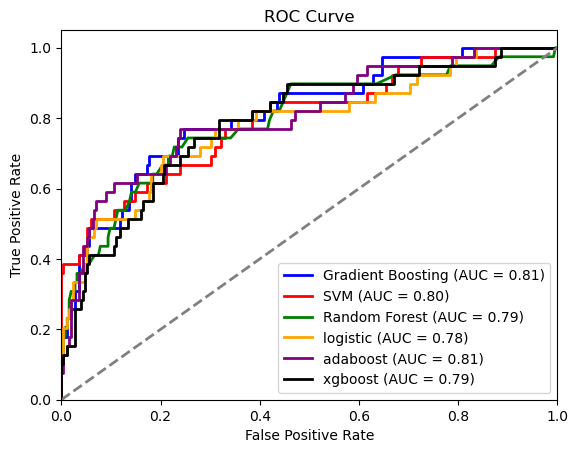

In [46]:
# Plotting the ROC curve
plt.figure()
plt.plot(fpr_gb, tpr_gb, color='blue', lw=2, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_lg, tpr_lg, color='orange', lw=2, label=f'logistic (AUC = {roc_auc_lg:.2f})')
plt.plot(fpr_ada, tpr_ada, color='purple', lw=2, label=f'adaboost (AUC = {roc_auc_ada:.2f})')
plt.plot(fpr_xg, tpr_xg, color='black', lw=2, label=f'xgboost (AUC = {roc_auc_xg:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


<div style="
  background-color: #f9f9f9;
  padding: 20px;
  border-left: 6px solid #4caf50;
  border-radius: 10px;
  font-family: 'Arial Black', sans-serif;
  color: #800080;
  font-size: 30px;
  text-align: left;
">
  Clustering Task
</div>


## Best Three Models




In [33]:
from operator import itemgetter

sorted_models = sorted(results.items(), key=lambda x: x[1]['avg_f1'], reverse=True)

selected_models = set()
top_3_models = []

for (scaler_name, model_name), result in sorted_models:
    if model_name not in selected_models:
        top_3_models.append(((scaler_name, model_name), result))
        selected_models.add(model_name)
    if len(top_3_models) == 3: 
        break

In [36]:
for (scaler_name, model_name), result in top_3_models:
    print(f"Scaler: {scaler_name}, Model: {model_name}")
    print(f"  Best Parameters: {result['best_params']}")
    print(f"  Best CV Score: {result['best_score']:.4f}")
    print(f"  Test Score: {result['test_score']:.4f}")
    print(f"  report:")
    print(result['report'])
    print(f"  Average F1: {result['avg_f1']:.4f}")
    print('-' * 50)

Scaler: StandardScaler, Model: SVM

  Best Parameters: {'C': 1, 'kernel': 'rbf'}

  Best CV Score: 0.8974

  Test Score: 0.9048

  report:

{'0': {'precision': 0.9127272727272727, 'recall': 0.984313725490196, 'f1-score': 0.9471698113207547, 'support': 255.0}, '1': {'precision': 0.7894736842105263, 'recall': 0.38461538461538464, 'f1-score': 0.5172413793103449, 'support': 39.0}, 'accuracy': 0.9047619047619048, 'macro avg': {'precision': 0.8511004784688996, 'recall': 0.6844645550527904, 'f1-score': 0.7322055953155497, 'support': 294.0}, 'weighted avg': {'precision': 0.8963773069036227, 'recall': 0.9047619047619048, 'f1-score': 0.8901384887071289, 'support': 294.0}}

  Average F1: 0.8112

--------------------------------------------------

Scaler: StandardScaler, Model: Random Forest

  Best Parameters: {'max_depth': 25, 'max_features': 'sqrt', 'n_estimators': 200}

  Best CV Score: 0.9270

  Test Score: 0.8980

  report:

{'0': {'precision': 0.9120879120879121, 'recall': 0.976470588235294

In [40]:
top_3_models    


[(('StandardScaler', 'SVM'),
  {'best_params': {'C': 1, 'kernel': 'rbf'},
   'best_score': 0.8973967848008769,
   'test_score': 0.9047619047619048,
   'report': {'0': {'precision': 0.9127272727272727,
     'recall': 0.984313725490196,
     'f1-score': 0.9471698113207547,
     'support': 255.0},
    '1': {'precision': 0.7894736842105263,
     'recall': 0.38461538461538464,
     'f1-score': 0.5172413793103449,
     'support': 39.0},
    'accuracy': 0.9047619047619048,
    'macro avg': {'precision': 0.8511004784688996,
     'recall': 0.6844645550527904,
     'f1-score': 0.7322055953155497,
     'support': 294.0},
    'weighted avg': {'precision': 0.8963773069036227,
     'recall': 0.9047619047619048,
     'f1-score': 0.8901384887071289,
     'support': 294.0}},
   'avg_f1': 0.8111720420113393}),
 (('StandardScaler', 'Random Forest'),
  {'best_params': {'max_depth': 25,
    'max_features': 'sqrt',
    'n_estimators': 200},
   'best_score': 0.9269925361448926,
   'test_score': 0.89795918367

In [54]:
top_3_models_names = [(scaler_name, model_name) for (scaler_name, model_name), _ in top_3_models]
top_3_models_set = set(top_3_models_names)

top_3_df = df_results[df_results.apply(lambda row: (row['Scaler'], row['Model']) in top_3_models_set, axis=1)]

print(top_3_df)


           Scaler                Model  Train Accuracy  Test Accuracy  \

1  StandardScaler  Logistic Regression        0.925869       0.880952   

2  StandardScaler                  SVM        0.965746       0.904762   

4  StandardScaler        Random Forest        1.000000       0.897959   



   Train F1 (Weighted)  Test F1 (Weighted)  Train F1 (Macro)  Test F1 (Macro)  

1             0.925771            0.877453          0.925771         0.726293  

2             0.965719            0.890138          0.965719         0.732206  

4             1.000000            0.884392          1.000000         0.721591  


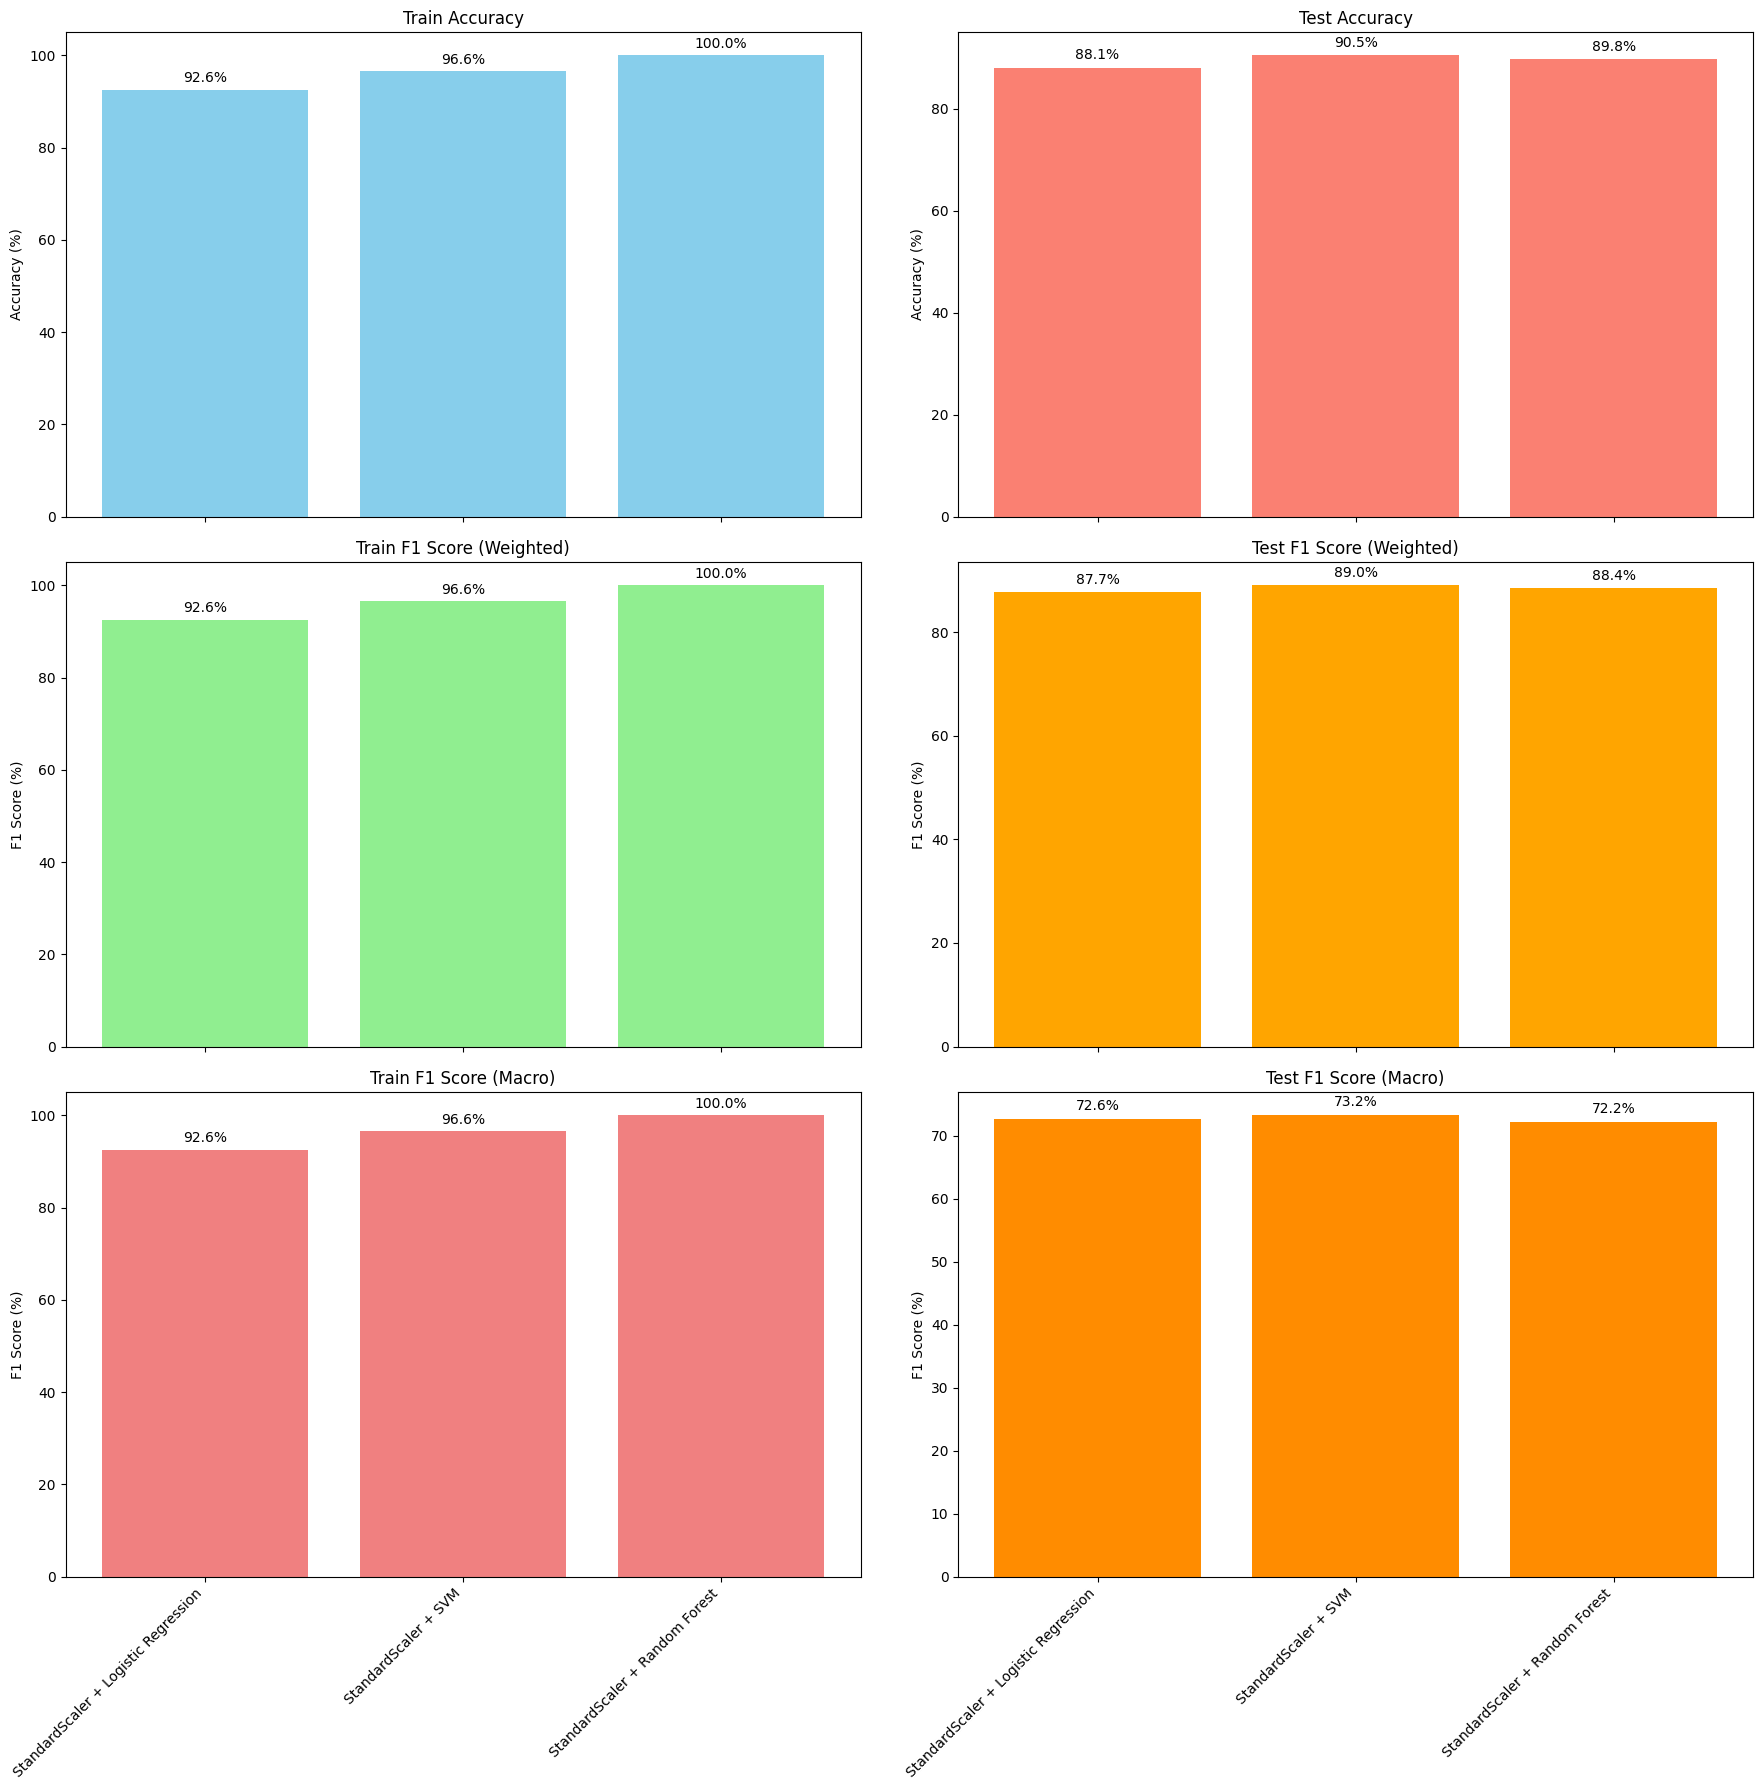

In [56]:
model_names = top_3_df.apply(lambda row: f"{row['Scaler']} + {row['Model']}", axis=1)
train_accuracy = top_3_df['Train Accuracy']
test_accuracy = top_3_df['Test Accuracy']
train_f1_weighted = top_3_df['Train F1 (Weighted)']
test_f1_weighted = top_3_df['Test F1 (Weighted)']
train_f1_macro = top_3_df['Train F1 (Macro)']
test_f1_macro = top_3_df['Test F1 (Macro)']

train_accuracy_perc = train_accuracy * 100
test_accuracy_perc = test_accuracy * 100
train_f1_weighted_perc = train_f1_weighted * 100
test_f1_weighted_perc = test_f1_weighted * 100
train_f1_macro_perc = train_f1_macro * 100
test_f1_macro_perc = test_f1_macro * 100

fig, axes = plt.subplots(3, 2, figsize=(18, 18), sharex='col')

# Train Accuracy
axes[0, 0].bar(model_names, train_accuracy_perc, color='skyblue')
axes[0, 0].set_title('Train Accuracy')
axes[0, 0].set_ylabel('Accuracy (%)')
axes[0, 0].set_xticklabels(model_names, rotation=45, ha='right')
for i, v in enumerate(train_accuracy_perc):
    axes[0, 0].text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

# Test Accuracy
axes[0, 1].bar(model_names, test_accuracy_perc, color='salmon')
axes[0, 1].set_title('Test Accuracy')
axes[0, 1].set_ylabel('Accuracy (%)')
axes[0, 1].set_xticklabels(model_names, rotation=45, ha='right')
for i, v in enumerate(test_accuracy_perc):
    axes[0, 1].text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

# Train F1 Score (Weighted)
axes[1, 0].bar(model_names, train_f1_weighted_perc, color='lightgreen')
axes[1, 0].set_title('Train F1 Score (Weighted)')
axes[1, 0].set_ylabel('F1 Score (%)')
axes[1, 0].set_xticklabels(model_names, rotation=45, ha='right')
for i, v in enumerate(train_f1_weighted_perc):
    axes[1, 0].text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

# Test F1 Score (Weighted)
axes[1, 1].bar(model_names, test_f1_weighted_perc, color='orange')
axes[1, 1].set_title('Test F1 Score (Weighted)')
axes[1, 1].set_ylabel('F1 Score (%)')
axes[1, 1].set_xticklabels(model_names, rotation=45, ha='right')
for i, v in enumerate(test_f1_weighted_perc):
    axes[1, 1].text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

# Train F1 Score (Macro)
axes[2, 0].bar(model_names, train_f1_macro_perc, color='lightcoral')
axes[2, 0].set_title('Train F1 Score (Macro)')
axes[2, 0].set_ylabel('F1 Score (%)')
axes[2, 0].set_xticklabels(model_names, rotation=45, ha='right')
for i, v in enumerate(train_f1_macro_perc):
    axes[2, 0].text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

# Test F1 Score (Macro)
axes[2, 1].bar(model_names, test_f1_macro_perc, color='darkorange')
axes[2, 1].set_title('Test F1 Score (Macro)')
axes[2, 1].set_ylabel('F1 Score (%)')
axes[2, 1].set_xticklabels(model_names, rotation=45, ha='right')
for i, v in enumerate(test_f1_macro_perc):
    axes[2, 1].text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Clustering

In [21]:
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA


In [22]:
def find_best_silhouette(X_scaled, kmeans_clusters_range, dbscan_eps_range, dbscan_min_samples_range, agglomerative_clusters_range):
    kmeans_scores = []
    dbscan_scores = []
    agglomerative_scores = []

    # Grid search for KMeans
    for n_clusters in kmeans_clusters_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
        labels = kmeans.fit_predict(X_scaled)
        score = silhouette_score(X_scaled, labels)
        kmeans_scores.append((n_clusters, score))

    # Grid search for DBSCAN
    for eps in dbscan_eps_range:
        for min_samples in dbscan_min_samples_range:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(X_scaled)
            if len(set(labels)) > 1:  # Check if there are at least two clusters
                score = silhouette_score(X_scaled, labels)
            else:
                score = -1
            dbscan_scores.append((eps, min_samples, score))

    # Grid search for AgglomerativeClustering with different linkages
    linkages = ['ward', 'complete', 'average', 'single']
    for linkage in linkages:
        for n_clusters in agglomerative_clusters_range:
            agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
            labels = agglomerative.fit_predict(X_scaled)
            score = silhouette_score(X_scaled, labels)
            agglomerative_scores.append((n_clusters, linkage, score))

    # Convert results to DataFrames for better visualization
    kmeans_df = pd.DataFrame(kmeans_scores, columns=['n_clusters', 'silhouette_score'])
    dbscan_df = pd.DataFrame(dbscan_scores, columns=['eps', 'min_samples', 'silhouette_score'])
    agglomerative_df = pd.DataFrame(agglomerative_scores, columns=['n_clusters', 'linkage', 'silhouette_score'])

    # Find the best result for each algorithm
    best_kmeans = kmeans_df.loc[kmeans_df['silhouette_score'].idxmax()]
    best_dbscan = dbscan_df.loc[dbscan_df['silhouette_score'].idxmax()]
    best_agglomerative = agglomerative_df.loc[agglomerative_df['silhouette_score'].idxmax()]

    # Print the best results
    print(f'Best KMeans: {best_kmeans}')
    print(f'Best DBSCAN: {best_dbscan}')
    print(f'Best AgglomerativeClustering: {best_agglomerative}')

    # Plot silhouette scores for different algorithms
    plt.figure(figsize=(18, 6))

    # Plot KMeans results
    plt.subplot(1, 3, 1)
    plt.plot(kmeans_df['n_clusters'], kmeans_df['silhouette_score'], marker='o', linestyle='--', color='b')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('KMeans Silhouette Scores')

    # Plot DBSCAN results
    plt.subplot(1, 3, 2)
    plt.scatter(dbscan_df['eps'], dbscan_df['min_samples'], c=dbscan_df['silhouette_score'], cmap='viridis', s=50)
    plt.colorbar(label='Silhouette Score')
    plt.xlabel('Epsilon (eps)')
    plt.ylabel('Min Samples')
    plt.title('DBSCAN Silhouette Scores')

    # Plot AgglomerativeClustering results
    plt.subplot(1, 3, 3)
    for linkage in linkages:
        subset = agglomerative_df[agglomerative_df['linkage'] == linkage]
        plt.plot(subset['n_clusters'], subset['silhouette_score'], marker='o', linestyle='--', label=linkage)
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('AgglomerativeClustering Silhouette Scores')
    plt.legend(title='Linkage')

    plt.tight_layout()
    plt.show()


In [246]:
kmeans_clusters_range = range(2, 21)
dbscan_eps_range = np.arange(0.1,5,0.1)
dbscan_min_samples_range = range(3, 11)
agglomerative_clusters_range = range(2, 21)

Best KMeans: n_clusters          2.00000

silhouette_score    0.12849

Name: 0, dtype: float64

Best DBSCAN: eps                 4.30000

min_samples         8.00000

silhouette_score   -0.08235

Name: 341, dtype: float64

Best AgglomerativeClustering: n_clusters                 2

linkage               single

silhouette_score    0.331032

Name: 57, dtype: object


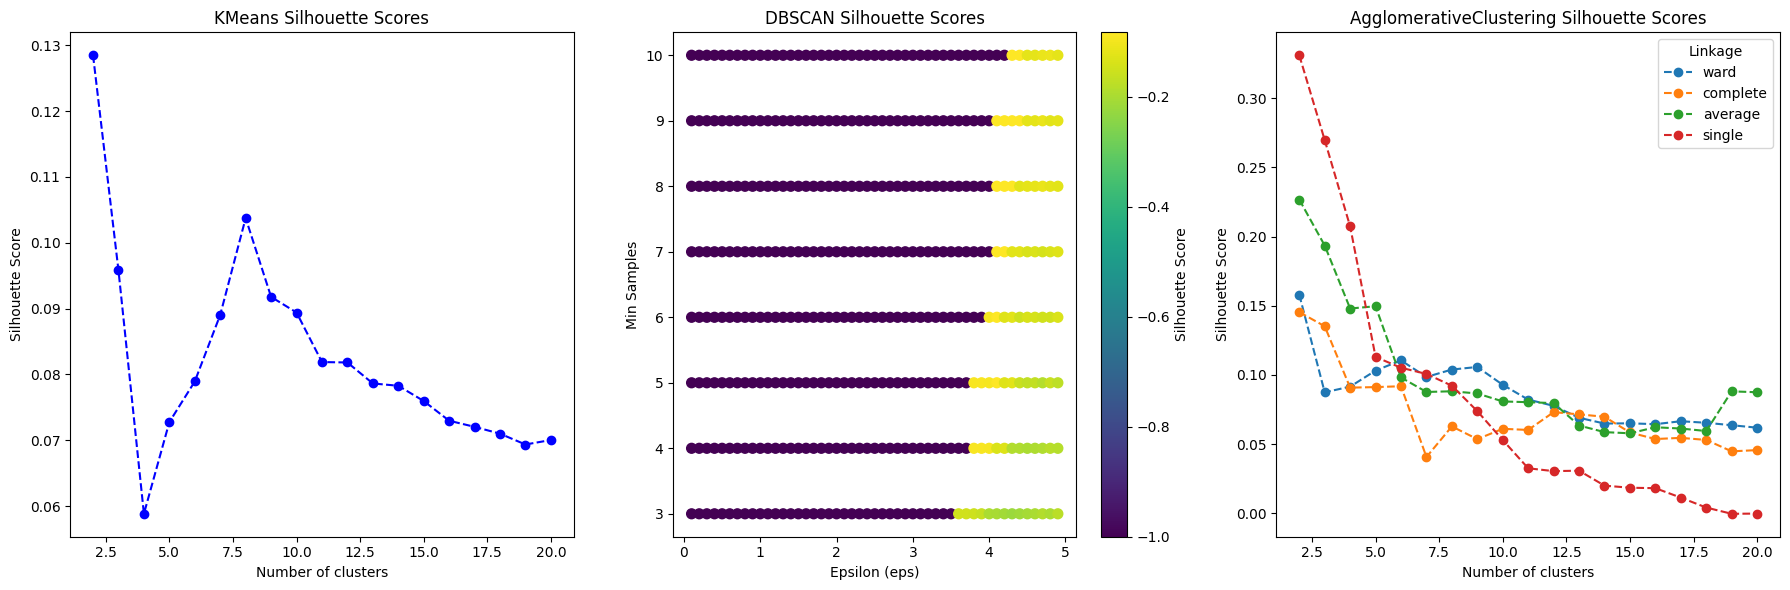

In [257]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
find_best_silhouette(df_scaled,kmeans_clusters_range,dbscan_eps_range,dbscan_min_samples_range,agglomerative_clusters_range)

Best KMeans: n_clusters          2.000000

silhouette_score    0.204043

Name: 0, dtype: float64

Best DBSCAN: eps                 4.900000

min_samples         3.000000

silhouette_score    0.547306

Name: 384, dtype: float64

Best AgglomerativeClustering: n_clusters                 2

linkage               single

silhouette_score    0.634849

Name: 57, dtype: object


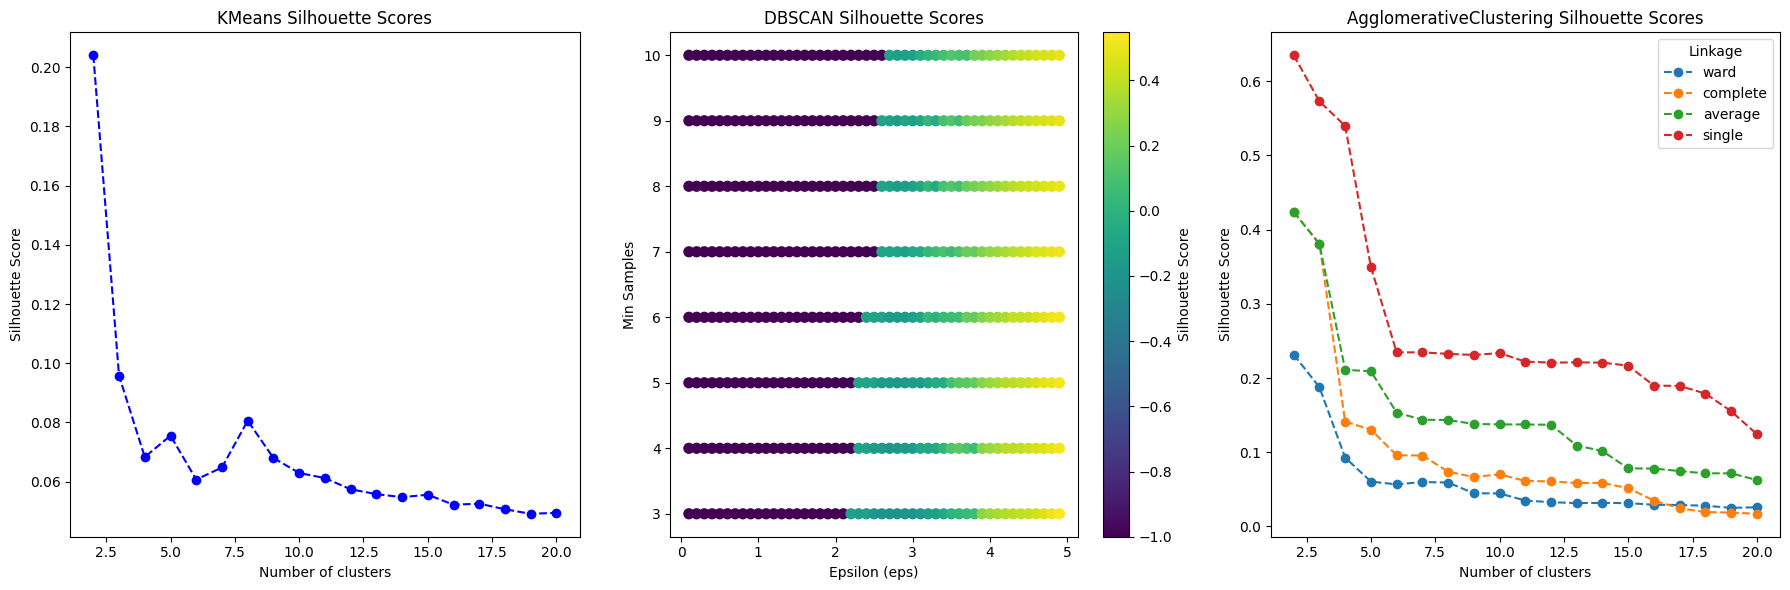

In [265]:
scaler = RobustScaler()
df_scaled = scaler.fit_transform(df)
find_best_silhouette(df_scaled,kmeans_clusters_range,dbscan_eps_range,dbscan_min_samples_range,agglomerative_clusters_range)

Best KMeans: n_clusters          2.00000

silhouette_score    0.12305

Name: 0, dtype: float64

Best DBSCAN: eps                 2.400000

min_samples         3.000000

silhouette_score    0.168806

Name: 184, dtype: float64

Best AgglomerativeClustering: n_clusters                 2

linkage               single

silhouette_score    0.168806

Name: 57, dtype: object


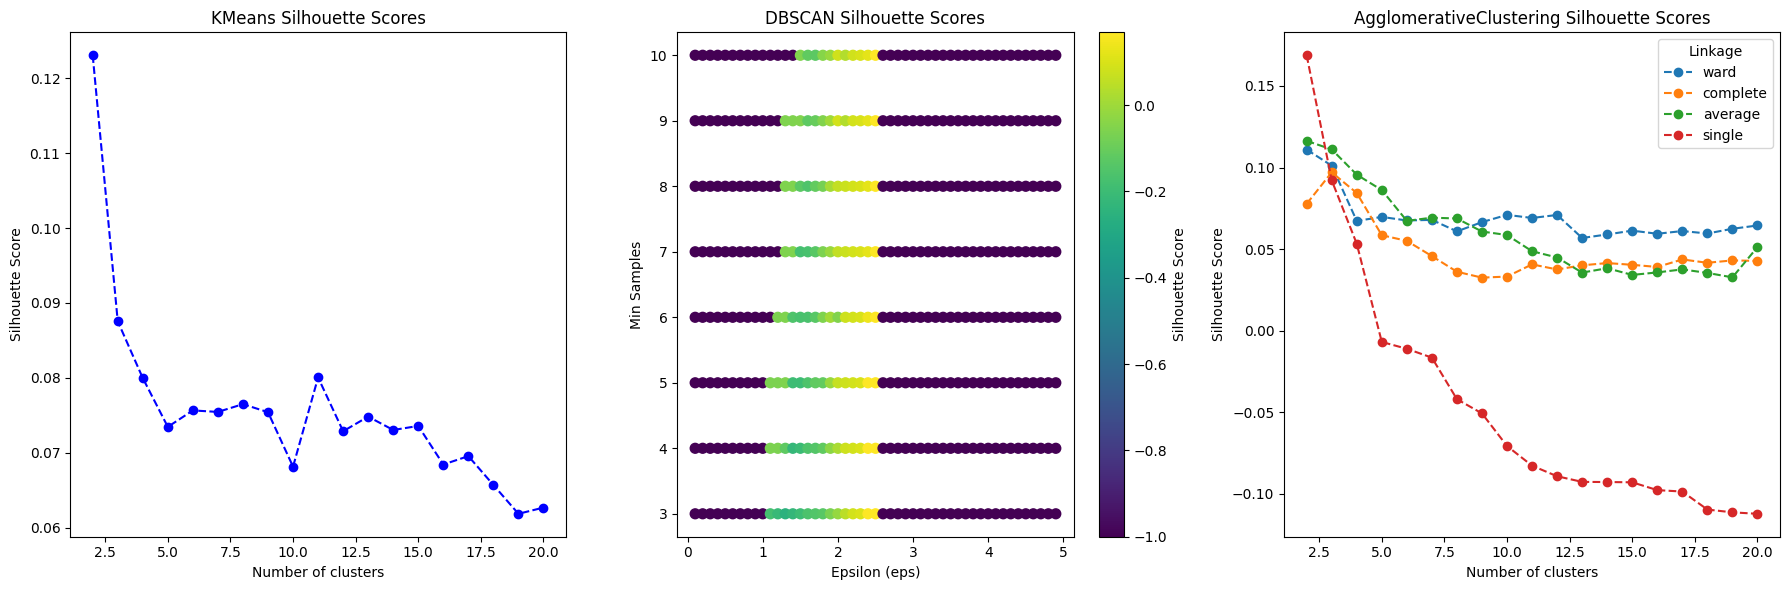

In [266]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
find_best_silhouette(df_scaled,kmeans_clusters_range,dbscan_eps_range,dbscan_min_samples_range,agglomerative_clusters_range)

I will continue with StandardScaler so we can compare before and after clustering

In [25]:
df_scaled = StandardScaler().fit_transform(df)
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
labels = kmeans.fit_predict(df_scaled)


In [26]:
df_clustering = df.copy()
df_clustering['cluster'] = labels
df_count = df_clustering.groupby(by=["cluster"]).size().reset_index(name="counts")
df_count

,cluster,counts
0,0,498
1,1,149
2,2,83
3,3,318
4,4,209
5,5,213


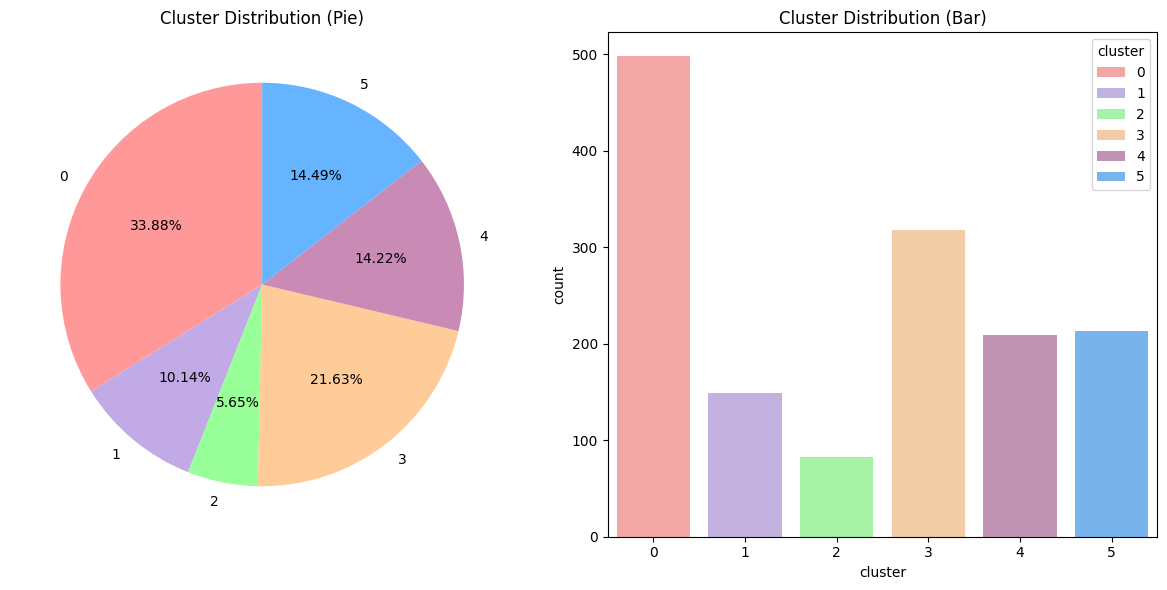

In [27]:

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
colors = ['#ff9999','#c1aae6', '#99ff99', '#ffcc99', '#c98bb5','#66b3ff','#ff6666','#c2f0c2']

# Pie chart in the first subplot
ax[0].pie(df_count['counts'], labels=df_count['cluster'], autopct='%.2f%%', startangle=90, colors=colors)
ax[0].set_title('Cluster Distribution (Pie)')

# Count plot in the second subplot
sns.countplot(data=df_clustering, x='cluster', ax=ax[1], palette=colors, hue='cluster')
ax[1].set_title('Cluster Distribution (Bar)')

plt.tight_layout()

plt.show()

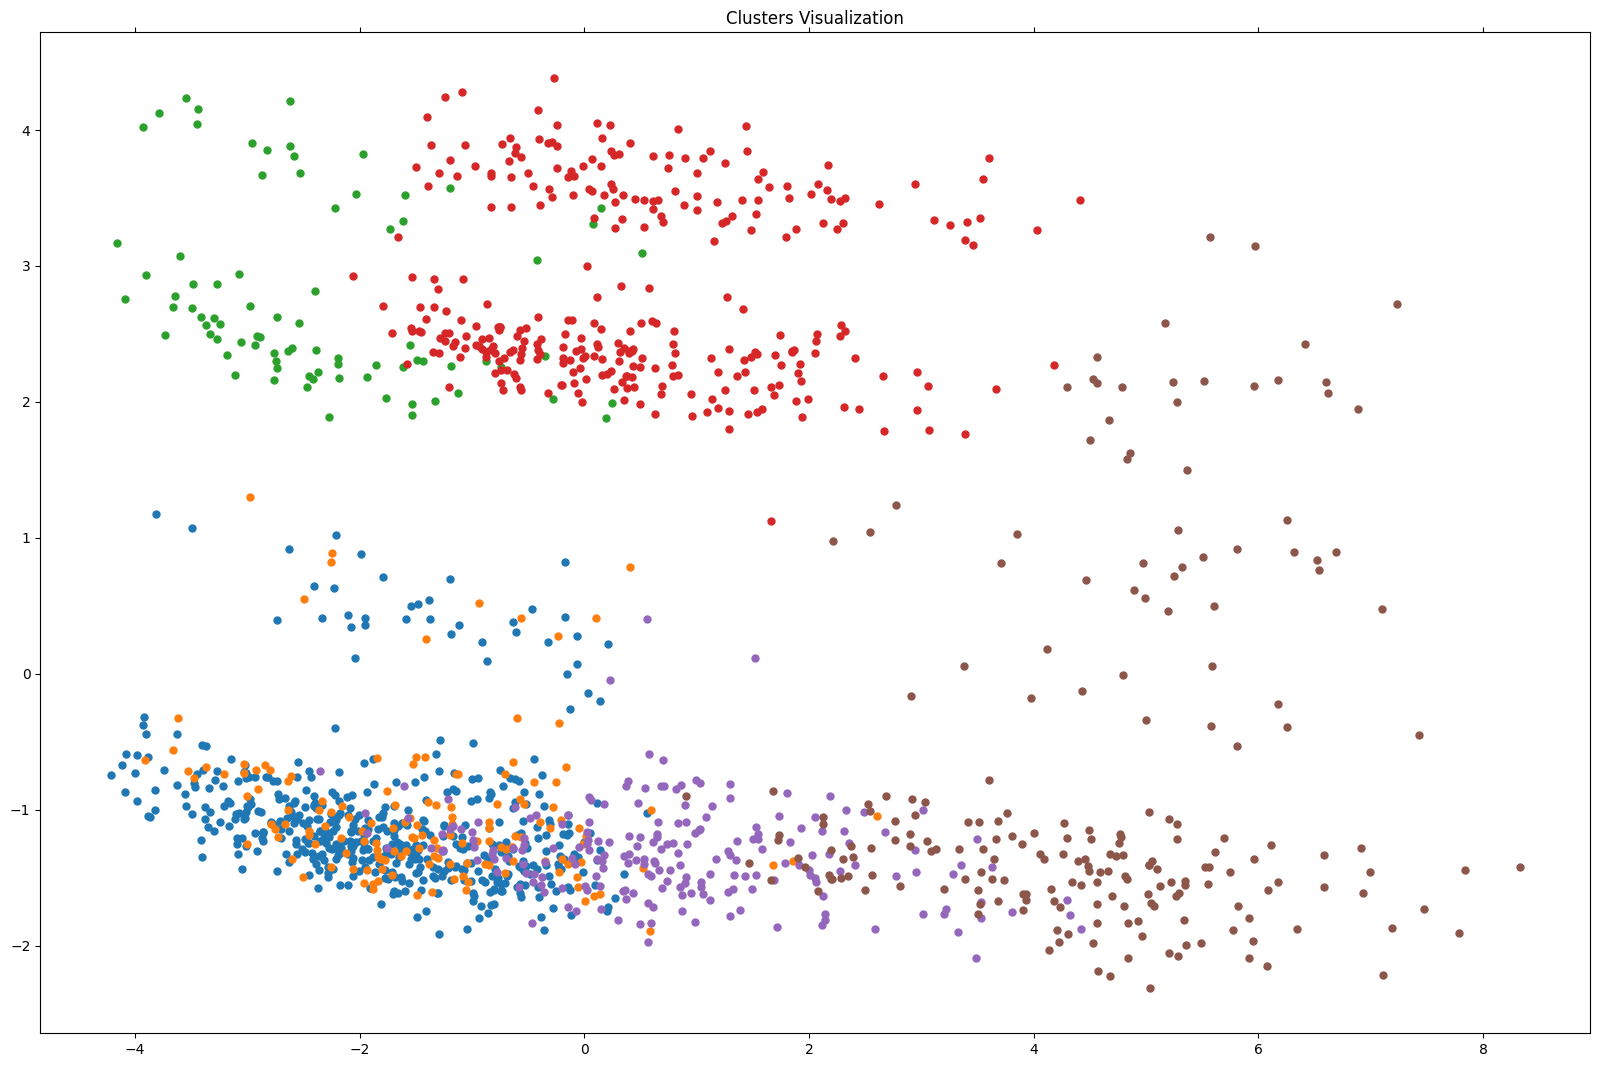

In [28]:
# dist = 1 - cosine_similarity(X_scaled)
pca = PCA(2)
pca.fit(df_scaled)
X_PCA = pca.transform(df_scaled)
X_PCA.shape

x_plot, y_plot = X_PCA[:, 0], X_PCA[:, 1]

df2 = pd.DataFrame({'x': x_plot, 'y':y_plot, 'label':labels}) 
groups = df2.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            )
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.set_title("Clusters Visualization")
plt.show()

In [41]:
df_train , df_test = train_test_split(df_clustering, test_size=0.2, random_state=42)


In [293]:
df_train.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeGroup,HighIncome,DistanceGroup,IncomeToRateRatio,TotalSatisfaction_mean,JobEnvSatisfactionInteraction,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,cluster
1097,24,0,350,21,2,1551,3,1,57,2,1,1,2296,10036,0,2,3,2,3,1,0,0,0.0,0,3.0,0.228776,2.2,3,False,True,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,0
727,18,0,287,5,2,1012,2,1,73,3,1,4,1051,13493,1,4,0,0,2,0,0,0,0.0,0,0.0,0.077892,3.2,8,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,0
254,29,0,1247,20,2,349,4,1,45,3,2,4,6931,10732,2,4,1,10,2,2,0,2,1.0,0,2.0,0.645826,3.6,16,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,2
1175,39,0,492,12,3,1654,4,1,66,3,2,2,5295,7693,4,3,0,7,3,4,1,0,2.0,0,1.0,0.688288,3.0,8,False,True,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,1
1341,31,0,311,20,3,1881,2,1,89,3,2,3,4197,18624,1,1,1,10,2,8,0,2,1.0,0,2.0,0.225354,2.4,6,False,True,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,0


In [294]:
df_test.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeGroup,HighIncome,DistanceGroup,IncomeToRateRatio,TotalSatisfaction_mean,JobEnvSatisfactionInteraction,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,cluster
1041,28,0,866,5,3,1469,4,1,84,3,2,1,8463,23490,0,4,0,6,4,4,1,3,1.0,1,0.0,0.360281,3.0,4,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,2
184,53,0,1084,13,2,250,4,0,57,4,2,1,4450,26250,1,3,2,5,3,2,1,3,3.0,0,1.0,0.169524,3.0,4,False,True,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,1
1222,24,1,240,22,1,1714,4,1,58,1,1,3,1555,11585,1,3,1,1,2,0,0,0,0.0,0,3.0,0.134225,2.8,12,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,0
67,45,0,1339,7,3,86,2,1,59,3,3,1,9724,18787,2,3,1,25,2,0,0,0,3.0,1,4.0,0.517592,2.4,2,False,True,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,0
220,36,0,1396,5,2,304,4,1,62,3,2,2,5914,9945,8,4,0,16,3,11,3,7,2.0,0,0.0,0.594671,3.4,8,False,True,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,1


In [42]:
X_test = df_test.drop(columns=['Attrition'])
y_test = df_test['Attrition']

In [47]:
smote = SMOTE(random_state=42)
x_clustering = df_train.drop(columns=['cluster'])
y_clustering = df_train['cluster']
x_resampled, y_resampled = smote.fit_resample(x_clustering, y_clustering)

df_resampled = pd.DataFrame(x_resampled, columns=x_clustering.columns)
df_resampled['cluster'] = y_resampled

df_resampled.head()

# X_train = df_resampled.drop(columns=['Attrition'])
# y_train = df_resampled['Attrition']



,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeGroup,HighIncome,DistanceGroup,IncomeToRateRatio,TotalSatisfaction_mean,JobEnvSatisfactionInteraction,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,cluster
0,24,0,350,21,2,1551,3,1,57,2,1,1,2296,10036,0,2,3,2,3,1,0,0,0.0,0,3.0,0.228776,2.2,3,False,True,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,0
1,18,0,287,5,2,1012,2,1,73,3,1,4,1051,13493,1,4,0,0,2,0,0,0,0.0,0,0.0,0.077892,3.2,8,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,0
2,29,0,1247,20,2,349,4,1,45,3,2,4,6931,10732,2,4,1,10,2,2,0,2,1.0,0,2.0,0.645826,3.6,16,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,3
3,39,0,492,12,3,1654,4,1,66,3,2,2,5295,7693,4,3,0,7,3,4,1,0,2.0,0,1.0,0.688288,3.0,8,False,True,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,4
4,31,0,311,20,3,1881,2,1,89,3,2,3,4197,18624,1,1,1,10,2,8,0,2,1.0,0,2.0,0.225354,2.4,6,False,True,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,0


In [48]:
df_results = []

top_3_models = [
    SVC(C=1, kernel='rbf', probability=True,random_state=42),
    RandomForestClassifier(max_depth=25, max_features='sqrt', n_estimators=200,random_state=42),
    LogisticRegression(C=0.1, penalty='l2',random_state=42)
]

clusters = df_resampled['cluster'].unique()
for cluster in clusters:
    print(f"\nCluster {cluster} Results:")
    
    # Filter the training data by cluster
    df_cluster_train = df_resampled[df_resampled['cluster'] == cluster]
    X_train = df_cluster_train.drop(columns=['Attrition', 'cluster'])
    y_train = df_cluster_train['Attrition']

    X_train,y_train = smote.fit_resample(X_train, y_train)
    
    # Filter the test data by cluster
    df_cluster_test = df_test[df_test['cluster'] == cluster]
    X_test = df_cluster_test.drop(columns=['Attrition', 'cluster'])
    y_test = df_cluster_test['Attrition']
    
    # Loop through each model
    for model in top_3_models:
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict on training data
        y_train_pred = model.predict(X_train)
        
        # Predict on test data
        y_test_pred = model.predict(X_test)
        
        # Train and test accuracy
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        train_f1_weighted = f1_score(y_train, y_train_pred, average='weighted')
        test_f1_weighted = f1_score(y_test, y_test_pred, average='weighted')
        train_f1_macro = f1_score(y_train, y_train_pred, average='macro')
        test_f1_macro = f1_score(y_test, y_test_pred, average='macro')
        
        # Classification report
        report = classification_report(y_test, y_test_pred)
        
        print(f"\nModel: {model.__class__.__name__}")
        print(f"Train Accuracy: {train_accuracy}")
        print(f"Test Accuracy: {test_accuracy}")
        print(f"Classification Report:\n{report}")

        df_results.append({
            'Cluster': cluster,
            'Model': model.__class__.__name__,
            'Train Accuracy': train_accuracy,
            'Test Accuracy': test_accuracy,
            'Train F1 (Weighted)': train_f1_weighted,
            'Test F1 (Weighted)': test_f1_weighted,
            'Train F1 (Macro)': train_f1_macro,
            'Test F1 (Macro)': test_f1_macro
           
        })

df_results = pd.DataFrame(df_results)



Cluster 0 Results:



Model: SVC

Train Accuracy: 0.608433734939759

Test Accuracy: 0.5268817204301075

Classification Report:

              precision    recall  f1-score   support



           0       0.91      0.51      0.65        81

           1       0.17      0.67      0.27        12



    accuracy                           0.53        93

   macro avg       0.54      0.59      0.46        93

weighted avg       0.82      0.53      0.60        93





Model: RandomForestClassifier

Train Accuracy: 1.0

Test Accuracy: 0.8817204301075269

Classification Report:

              precision    recall  f1-score   support



           0       0.90      0.98      0.93        81

           1       0.60      0.25      0.35        12



    accuracy                           0.88        93

   macro avg       0.75      0.61      0.64        93

weighted avg       0.86      0.88      0.86        93





Model: LogisticRegression

Train Accuracy: 0.7439759036144579

Test Accuracy: 0.784

In [49]:
df_results

,Cluster,Model,Train Accuracy,Test Accuracy,Train F1 (Weighted),Test F1 (Weighted),Train F1 (Macro),Test F1 (Macro)
0,0,SVC,0.608434,0.526882,0.569365,0.601229,0.569365,0.458730
1,0,RandomForestClassifier,1.000000,0.881720,1.000000,0.859818,1.000000,0.643926
2,0,LogisticRegression,0.743976,0.784946,0.743976,0.806242,0.743976,0.622565
3,3,SVC,0.605042,0.614286,0.600021,0.645449,0.600021,0.440663
4,3,RandomForestClassifier,1.000000,0.842857,1.000000,0.801371,1.000000,0.589333
5,3,LogisticRegression,0.715686,0.742857,0.715681,0.768543,0.715681,0.650388
6,4,SVC,0.692405,0.680000,0.675364,0.743867,0.675364,0.584200
7,4,RandomForestClassifier,1.000000,0.900000,1.000000,0.852632,1.000000,0.473684
8,4,LogisticRegression,0.816456,0.600000,0.815910,0.679825,0.815910,0.451754
9,1,SVC,0.715100,0.517241,0.703299,0.561494,0.703299,0.436111


In [46]:
df_results = pd.DataFrame(df_results)

df_avg_results = df_results.groupby('Model').mean().reset_index()
df_avg_results.drop('Cluster',axis=1,inplace=True)

print(df_avg_results)


                    Model  Train Accuracy  Test Accuracy  Train F1 (Weighted)  \

0      LogisticRegression        0.842900       0.819497             0.805405   

1  RandomForestClassifier        1.000000       0.822362             1.000000   

2                     SVC        0.809087       0.849531             0.729015   



   Test F1 (Weighted)  Train F1 (Macro)  Test F1 (Macro)  

0            0.795953          0.562825         0.544181  

1            0.773209          1.000000         0.471339  

2            0.781870          0.444579         0.458596  


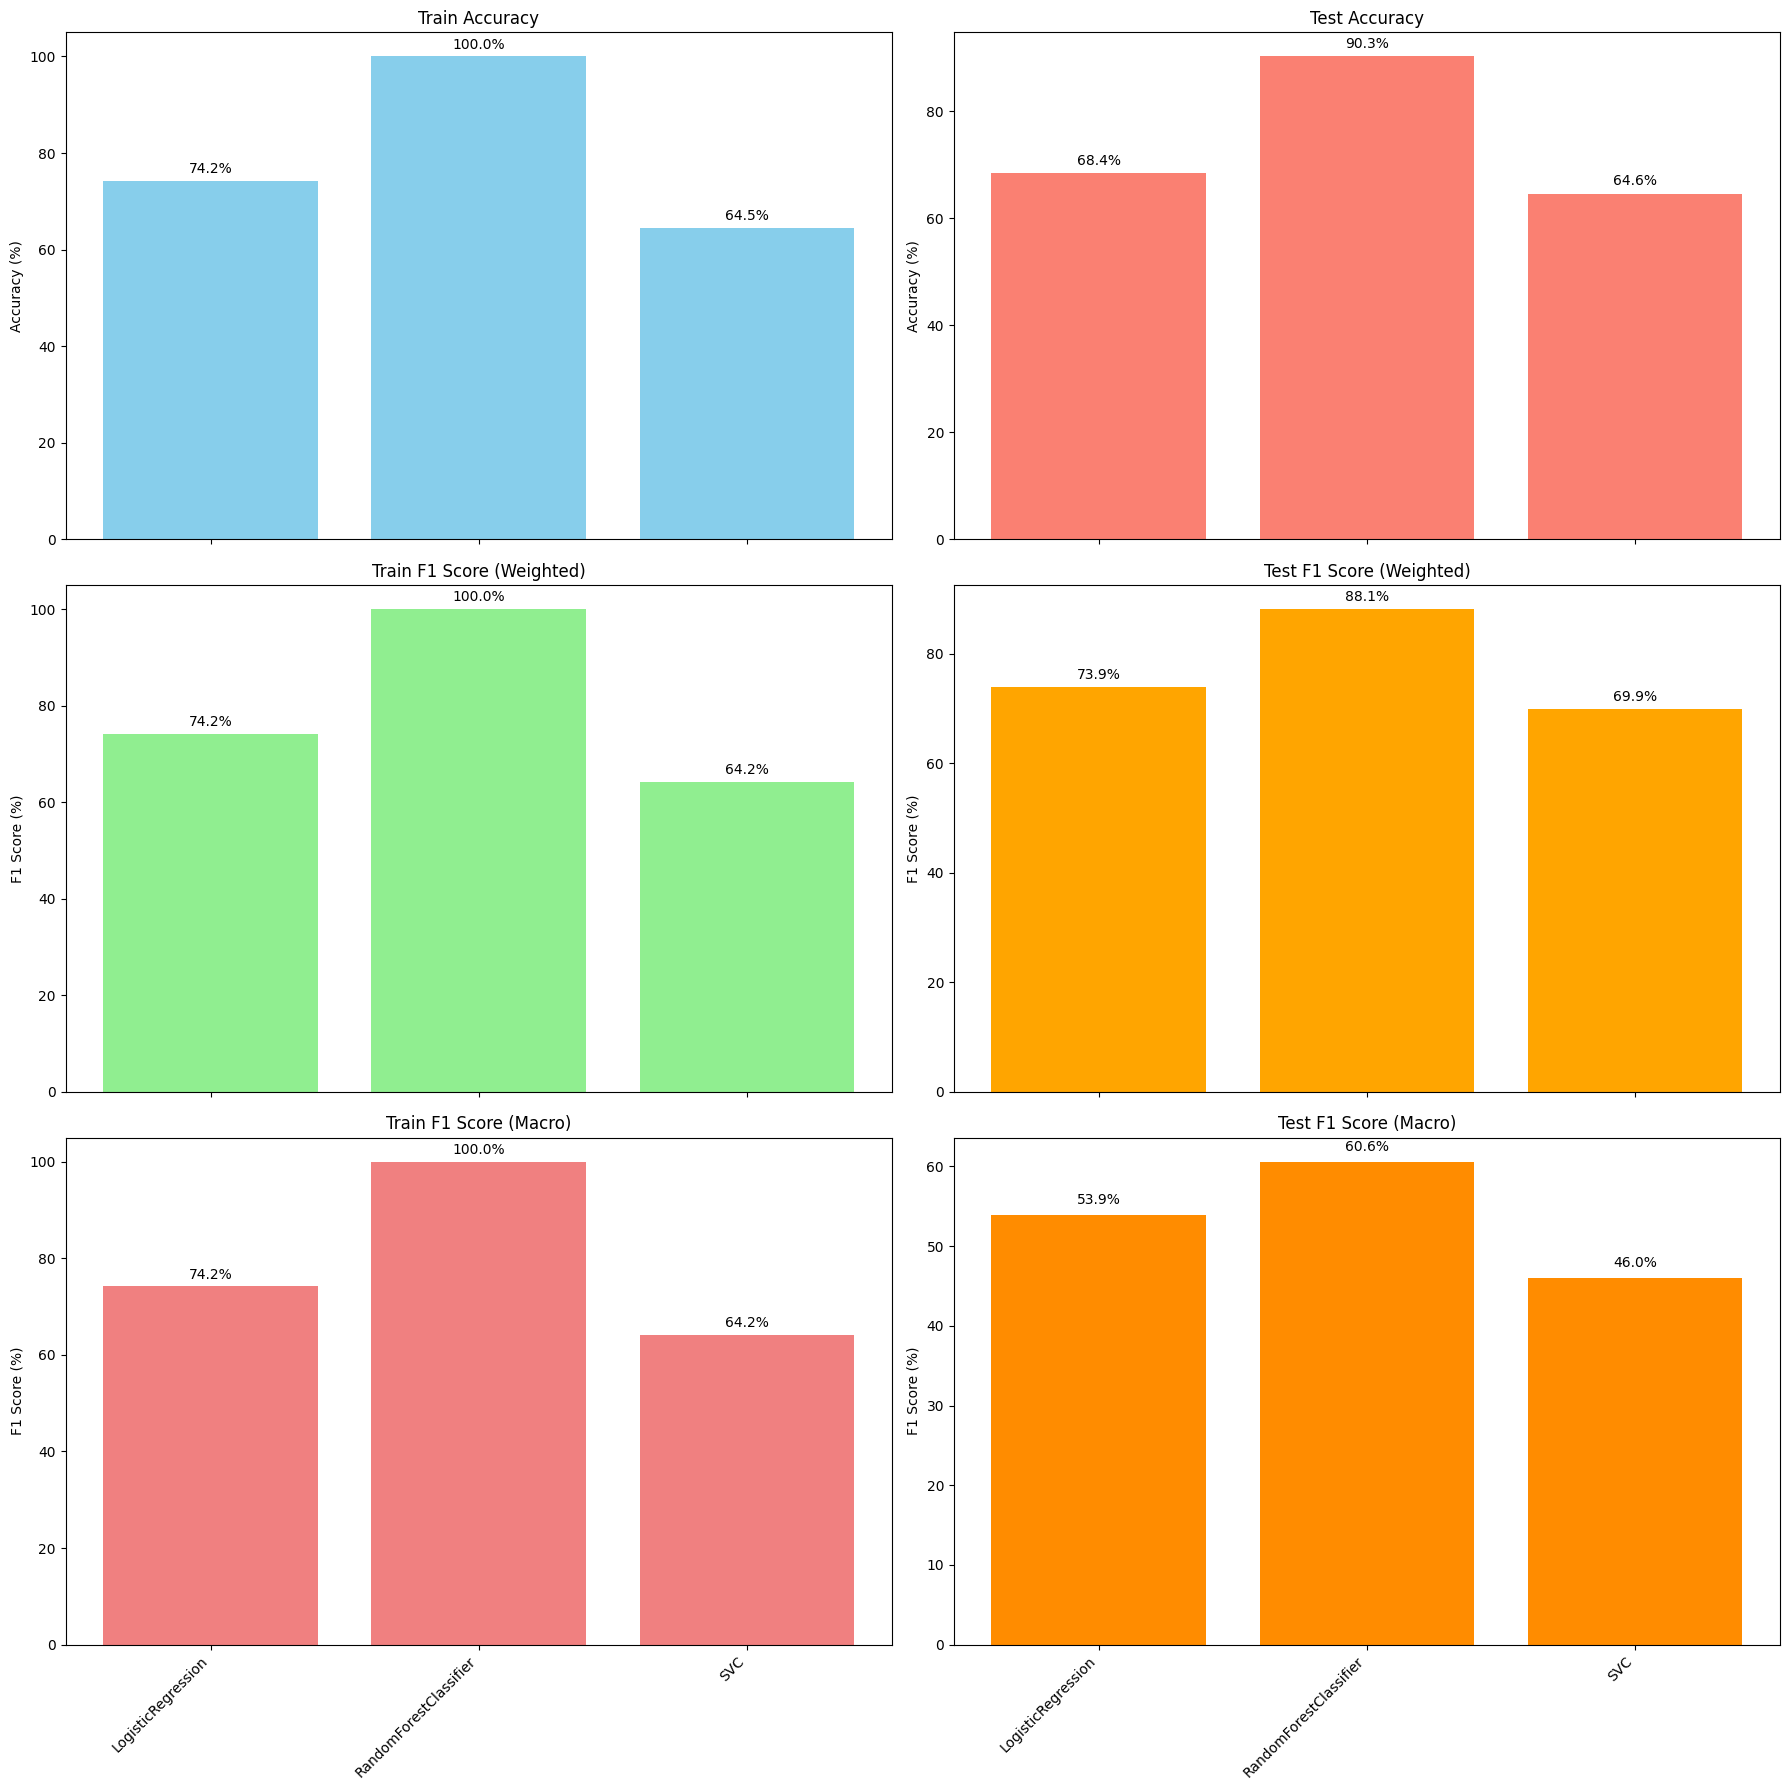

In [303]:
model_names = df_avg_results['Model']
train_accuracy = df_avg_results['Train Accuracy']
test_accuracy = df_avg_results['Test Accuracy']
train_f1_weighted = df_avg_results['Train F1 (Weighted)']
test_f1_weighted = df_avg_results['Test F1 (Weighted)']
train_f1_macro = df_avg_results['Train F1 (Macro)']
test_f1_macro = df_avg_results['Test F1 (Macro)']

train_accuracy_perc = train_accuracy * 100
test_accuracy_perc = test_accuracy * 100
train_f1_weighted_perc = train_f1_weighted * 100
test_f1_weighted_perc = test_f1_weighted * 100
train_f1_macro_perc = train_f1_macro * 100
test_f1_macro_perc = test_f1_macro * 100

fig, axes = plt.subplots(3, 2, figsize=(18, 18), sharex='col')

# Train Accuracy
axes[0, 0].bar(model_names, train_accuracy_perc, color='skyblue')
axes[0, 0].set_title('Train Accuracy')
axes[0, 0].set_ylabel('Accuracy (%)')
axes[0, 0].set_xticklabels(model_names, rotation=45, ha='right')
for i, v in enumerate(train_accuracy_perc):
    axes[0, 0].text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

# Test Accuracy
axes[0, 1].bar(model_names, test_accuracy_perc, color='salmon')
axes[0, 1].set_title('Test Accuracy')
axes[0, 1].set_ylabel('Accuracy (%)')
axes[0, 1].set_xticklabels(model_names, rotation=45, ha='right')
for i, v in enumerate(test_accuracy_perc):
    axes[0, 1].text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

# Train F1 Score (Weighted)
axes[1, 0].bar(model_names, train_f1_weighted_perc, color='lightgreen')
axes[1, 0].set_title('Train F1 Score (Weighted)')
axes[1, 0].set_ylabel('F1 Score (%)')
axes[1, 0].set_xticklabels(model_names, rotation=45, ha='right')
for i, v in enumerate(train_f1_weighted_perc):
    axes[1, 0].text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

# Test F1 Score (Weighted)
axes[1, 1].bar(model_names, test_f1_weighted_perc, color='orange')
axes[1, 1].set_title('Test F1 Score (Weighted)')
axes[1, 1].set_ylabel('F1 Score (%)')
axes[1, 1].set_xticklabels(model_names, rotation=45, ha='right')
for i, v in enumerate(test_f1_weighted_perc):
    axes[1, 1].text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

# Train F1 Score (Macro)
axes[2, 0].bar(model_names, train_f1_macro_perc, color='lightcoral')
axes[2, 0].set_title('Train F1 Score (Macro)')
axes[2, 0].set_ylabel('F1 Score (%)')
axes[2, 0].set_xticklabels(model_names, rotation=45, ha='right')
for i, v in enumerate(train_f1_macro_perc):
    axes[2, 0].text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

# Test F1 Score (Macro)
axes[2, 1].bar(model_names, test_f1_macro_perc, color='darkorange')
axes[2, 1].set_title('Test F1 Score (Macro)')
axes[2, 1].set_ylabel('F1 Score (%)')
axes[2, 1].set_xticklabels(model_names, rotation=45, ha='right')
for i, v in enumerate(test_f1_macro_perc):
    axes[2, 1].text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()